## Проанализируем данные итогов торговли на фондовом рынке за 2022 год 

В первую очередь импортируем все необходимые библиотеки для подготовки и визуализации данных 

In [22]:
#open new data dase file
import plotly
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

Далее загрузим файл Базы Данных хранящий метрики:

In [23]:
traid_data = pd.read_csv('/Users/papaskakun/Desktop/GIT/Project_traiding/Data/market_traiding.csv',
                          header=0, 
                         names = ['Date', 'Name',
                                  'Type', 'Open_price',
                                  'Value','Close price','Reasons', 'Step',
                                  'Step price', 'Delta','Total'],                       
                         sep = ';')
traid_data

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total
0,15.01.2022,BRH2022,лонг,"85,65",1,"88,00",переложил позицию,"0,01","7,61","1788,24","101788,24"
1,15.01.2022,LKH2022,лонг,"67491,00",1,"65740,00",собственное решение,1,1,-1751,"100037,24"
2,15.01.2022,MXH2022,лонг,"368075,00",1,"351600,00",Не опытность,1,1,-16475,"83562,24"
3,19.01.2022,RIH2022,лонг,"141730,00",1,"141400,00",выбило по стопу,10,"15,3","-504,9","83057,34"
4,19.01.2022,GDH2022,лонг,"1843,00",1,"1838,00",выбило по стопу,1,"76,21","-381,05","82676,29"
...,...,...,...,...,...,...,...,...,...,...,...
418,06.12.2022,GD 3.23,лонг,"1753,90",1,"1752,10",stop,"0,1","6,182","-111,28","157657,22"
419,07.12.2022,SPYF 03.23,лонг,"395,00",1,"393,80",stop,"0,01","0,62425","-74,91","157582,31"
420,07.12.2022,SPYF 03.23,лонг,"394,70",1,"393,80",stop,"0,01","0,62425","-56,18","157526,13"
421,09.12.2022,GD 3.23,шорт,"1774,00",1,"1782,00",stop,"0,1","6,182","-494,56","157031,57"


In [24]:
traid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         423 non-null    object
 1   Name         423 non-null    object
 2   Type         423 non-null    object
 3   Open_price   423 non-null    object
 4   Value        423 non-null    int64 
 5   Close price  423 non-null    object
 6   Reasons      423 non-null    object
 7   Step         423 non-null    object
 8   Step price   423 non-null    object
 9   Delta        423 non-null    object
 10  Total        423 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.5+ KB


Запросив информацию о типах столбцов мы видим что многие из них имеют тип <b>"object"</b>. Нам для дадьнейшей работы необходимы значения типа <b>"float"</b> для некоторых столбцов займемся их преобразованием:

In [25]:
# replace ','
traid_data['Delta'] = traid_data['Delta'].str.replace(',', '.')
traid_data['Delta'] = traid_data['Delta'].astype('float')
# replace in Total
traid_data['Total'] = traid_data['Total'].str.replace(',', '.')
traid_data['Total'] = traid_data['Total'].astype('float')
# replace in Open
traid_data['Open_price'] = traid_data['Open_price'].str.replace(',', '.')
traid_data['Open_price'] = traid_data['Open_price'].astype('float')
# replace Close 
traid_data['Close price'] = traid_data['Close price'].str.replace(',', '.')
traid_data['Close price'] = traid_data['Close price'].astype('float')

Выполнив первичную подготовку данных мы можем построить график изменения баланса в течении года:

In [26]:
# display dinamic of balance
fig = px.line(
    traid_data,
    x='Date',
    y='Total',
    #color="continent",
    #line_group="country",
    #hover_name="country",
    #line_shape="spline",
    render_mode="svg")
fig.show();

Судя по данному графику мы можем сделать следующие выводы:
* В начальном переоде наблюдается сильная валантильность, так же стоить принять во внимание что до 06   месяца(Июнь) риск не учитывался что приводило к открытию слишком больших позиций отсюда и дизбаланс между данными переодами, в дальнейшем мы будет использовать точку 6ого месяца еще не раз.
* По динамике от 6ого месяца можем судить что валантильность партфеля была не большая, на это положительно сказалась политика риск менеджмента, и ограничения рисков.

<b>Для дальнейшей работы необходимо выделить признак месяца торгов для дальнейшей групировки.</b>

In [27]:
# change type of Date column to datetime format
traid_data['Date'] = pd.to_datetime( traid_data['Date'])

# creatde new sign to compose date by mounth
traid_data['MonthSale'] = traid_data['Date'].dt.month

# only for compare with proportion display numberts of contract per month
help_chart = traid_data.groupby('MonthSale')['Value'].count()
#display(help_chart)

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '15.01.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '19.01.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '20.01.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '21.01.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/papaskakun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/

Увидив количесво сделок по месяцам, можем построить гистограмму показывающую количесво взятых контрактов:

In [28]:
fig = px.histogram(help_chart,
                   x=help_chart.index,
                   y = ['Value'],
                   nbins=12,
                   title="Количесво взятых контрактов по месяцам",
                   #hover_data = ['Value']
                   #labels={'x':'Number of Month', 'y':'counts of Contracts'}
                  )
fig.update_layout(hovermode="x unified") # Указываем что подскзку показываем сразу для всех элементов 
                                         # в разрезе по оси X. По мне просто бомба для этого графика, 
                                         # особенно для 4 колонки, где непонятно, есть второй сегмент 
                                         # клиентов или нету
fig.show()

Из данной гистограммы мы видим большое количесво наблюдений приходящихся на 1 и 2 месяцы когда торговля велась без применения стратегий риск-менеджмента.
Так же наблюдается повышеное количесво торгов с 6 - 9 месяцы (летний период) 

Далее выделим из перечня торгуемых контрактов имя инструмента и подведем статистику исходя из самого популярного инструмента.

In [29]:
from outliers_lib.get_n import get_name
traid_data['NameComtract'] = traid_data['Name'].apply(get_name)
#created new sign
traid_data['NameComtract'] = traid_data['Name'].apply(get_name)
# check changes 
#display(traid_data['NameComtract'].loc[::10])

Теперь приведем разные вариации наименований к одному виду, для этого импортируем соответсвующие функции из внешних файлов:

In [30]:
from outliers_lib.clear_func import change_rts
from outliers_lib.clear_func import get_br_type
from outliers_lib.clear_func import get_si_type
from outliers_lib.clear_func import get_gd_type
from outliers_lib.clear_func import get_sf_type

traid_data['NameComtract'] = traid_data['NameComtract'].apply(change_rts)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_br_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_si_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_gd_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_sf_type)

# check changes
#display(traid_data['NameComtract'].value_counts(normalize = True))

Визуализируем измененые данные, для понимания какие контракты торговали чаще всего:

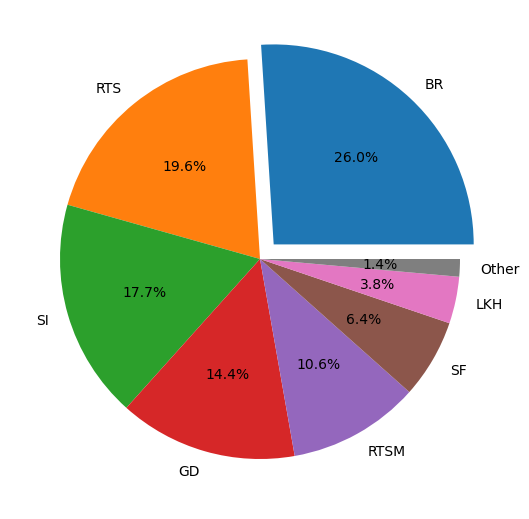

In [31]:
# create pie chart

# improving data only for correct visualization
popular_con = traid_data['NameComtract'].value_counts().nlargest(7).index
con_for_chart = traid_data['NameComtract'].apply(lambda x: x if x in popular_con else 'other')

#make chart
pie_chart = con_for_chart.value_counts(normalize = True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0 , 0, 1, 1])
axes.pie(
    pie_chart,
    labels= ['BR','RTS','SI','GD','RTSM','SF','LKH','Other'],
    autopct='%.1f%%',
    explode = [0.1, 0,0,0,0,0,0,0]
);

Исходя из диаграммы можем заключить что самым популярным инструментом к торговле стал фьючерс на сырую нефть марки <b>BRENT</b>

Из полученной выборки можем заключить что вторым по частоте торговался фьючерс на индекс российских акций <b>(RTS)</b>, это фьючерс с высоким гарантийным обеспечением <b>(дорогой)</b> и с высокой валантильностью, во многом именно его торговля в начале диапозона привела к такой сильной валантильности.

Следующим по значению стал фьючерс на валютную пару Рубль-Доллар, который в 2022 году потерял очень большой объем ликвидности, в следствии чего его торговля привела к существенным убыткам уже к 6 месяцу года (Убытки случились в следствии того что в оствусвтвии ликвидных объемов рынок вел себя "не адекватно")

Далее идут более анализа пригодные активы это фьючерсы на: Золото, Малый фьючерс на Российские акции и фьючерс на фондовый индекс 500 крупнейших американских компаний

В дальнейшем анализе мы обратим внимание на фактор влияния конктретного инструмента на портфель

На данный момент необходимо выделить количесво открытых покупок <b>(Long)</b> и продаж <b>(Short)</b> за год:


In [44]:
# check that info from types of contract direction
#
traid_data['Type'].value_counts(normalize = True)

# group date  to create chart
bar_chart_types = traid_data.groupby(
    ['NameComtract','Type'],
    as_index=False
).count()[['NameComtract','Type','Value']]
#display(bar_chart_types)

# create chart of direction
fig = px.bar(
    bar_chart_types,
    x = 'NameComtract',
    y = 'Value',
    color = 'Type',
    title="Отношение коротких и длинных позиций",
    text_auto='.2s'# print value on bar 
)
fig.update_layout(barmode='stack')
fig.show()

По соотношению коротких и длинных позиций можем судить о примерно равных количесвах позиций что говорит о более профессиальном подходе, не испытывая каких либо пристрастиый стороне открытия.
Из общего показателя снова выделяются 2 инструмента, это RTS и SI если в первом случае это торговля интенсивная и сконцентрированная на коротком промежутке (1,5 месяца), то причиной перевеса шортовых позиций в торговле могло стать влияние новостной повестки 

Далее подготовим признак причины закрытия сделки к анализируемому виду, для этого уточним вариакцию причин и напишем функцию для замены:

In [33]:
#acquaintance with data of reasons
traid_data['Reasons'].value_counts()

stop                               125
take                                57
Выбило по стопу                     48
закрыл вруную                       38
 Закрыл вручную                     35
hans                                33
закрыл в руччную                    22
hands                               22
тейк                                10
стоп                                 9
Stop                                 8
 Тейк                                7
выбило по стопу                      2
Дивергенция,ставка на повышение      1
Тейк                                 1
переложил на лонг                    1
собственное решение                  1
 Не опытность                        1
Просто повезло                       1
переложил позицию                    1
Name: Reasons, dtype: int64

Приступаем к применению функции:

In [36]:
from outliers_lib.type_func import get_stop
from outliers_lib.type_func import get_by_hands
from outliers_lib.type_func import get_take
from outliers_lib.type_func import get_other

traid_data['Reasons'] = traid_data['Reasons'].apply(get_stop)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_by_hands)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_take)

# call to last improve to change last trash on type 'other'
traid_data['Reasons'] = traid_data['Reasons'].apply(get_other)
#display(traid_data['Reasons'].loc[::10])

После подготовки признака причины выхода мы можем приступить к визуализации данного признака:

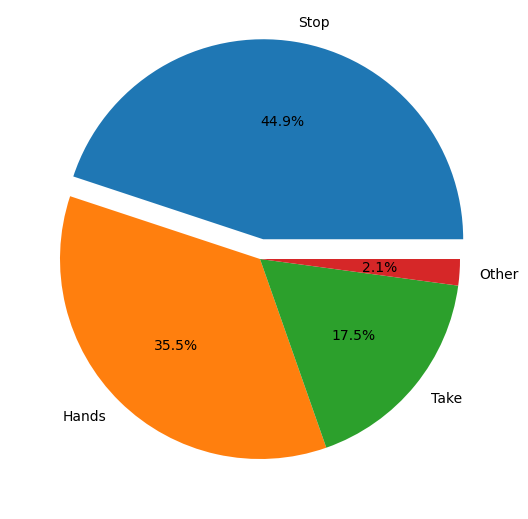

In [17]:
#create chart of reasons of closed
pie_chart = traid_data['Reasons'].value_counts(normalize = True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0 , 0, 1, 1])
axes.pie(
    pie_chart,
    labels= ['Stop','Hands','Take','Other'],
    autopct='%.1f%%',
    explode = [0.1, 0,0,0]
);

Видим что немногим менее половины сделок было закрыто по стопу, не плохой результат если в течении года соотношение риска к прибыли сохраняется на уровне 1 к 3 то такой результат должен принести прибыль в 2 раза привышающую риск на сделку, так же актуально может быть сложить все остальные показатели со стопом кроме диаметрально противоположеного (тейка), для чистоты определения "Если вышли не по лимитке (цели), то соотношение или прогнозируемая прибыль не получена"  или получена, но меньщая, что возращаясь к твердозафиксируемому фактору закрытия по стопу в 45%, может ухудшить показатель соотношения риска к прибыли и ввести дифицит баланса. В случае если мы принимаем стороны "либо черное - либо белое" то сделок с достижением цели (тейк) остается 35.5% а сделок не сделавших цели 64.5%. 
Данный подход стирает полутонна и позволяет абсолютно определить без каких либо условий сохранялось ли соотношение риска к прибили в течении года, можем сказать что да, но состояние пограничное с таким результатом цели в будущем должны быть 1 к 4 или 1 к 5, что на практике труднодостижимо, так что нужно закрощать количество
стопов и увеличивать количесво тейков.

Следующим пунктом сделаем признак "захваченого движения" он будет отражать процентное движение цены актива пока мы были в сделке.
Стоит понимать что признак без привязки к нашей позиции. Может быть не привычно для понимания, но признак может быть отрицательным (будет означать что актив подещевел) но при этом у нас может быть прибыль в случае если позиция была открыта так же на понижение, или убытки что будет сонаправлено признаку но уменьшит наш баланс.

In [39]:
# reserch delta in persent 
#formul:
traid_data['Proportion'] = traid_data.apply(lambda x: (x['Close price']- x['Open_price']) / (x['Open_price']/ 100) , axis = 1)
display(traid_data['Proportion'])

0      2.743724
1     -2.594420
2     -4.475990
3     -0.232837
4     -0.271297
         ...   
418   -0.102628
419   -0.303797
420   -0.228021
421    0.450958
422    1.327655
Name: Proportion, Length: 423, dtype: float64

В следующем списке мы можем увидеть краткую статистическую информ апцию о признаки, но удобней увидеть общее распределение сделок относительно оси Ноль так что сразу можно переходить к диаграмме распределения:

In [40]:
traid_data['Proportion'].describe()

count    423.000000
mean      -0.037429
std        1.907949
min       -8.132028
25%       -0.873976
50%       -0.040950
75%        0.621960
max        6.742151
Name: Proportion, dtype: float64

In [41]:
fig = px.scatter(traid_data, x='Date', y='Proportion', trendline= 'ols')
fig.show()

Далее у нас идет краткий обзор на разные ракурсы иследования признака "захваченого движения" 

In [42]:
fig = px.box(traid_data, y='Proportion')
fig.show()

Можем судить что плотность наших пропорций находится в узком дмапозоне значений между +0,6% и - 0,9% движения цены в дальнейшем мы разберем этот фактор в проекции на временые периоды и на конкретный инструмент.
Межквартильный размах составляет уже большие движения цены между +2,7% и -3% движениям цены что может говорить о наличии у нас на этих уровнях либо тейков либо стопов.

Так же нельзя не заметить явное наличие выбросов что может говорить о "вредных" сделках с проскальзованием или без стопа

In [43]:
fig = px.box(traid_data,x='MonthSale', y='Proportion')
fig.show()


На данной диаграмме по месяцам мы видим распределение "захваченного движения"